In [1]:
import pandas as pd
import numpy as np

In [5]:
import zipfile
import os
# Now, we have to unzip it
with zipfile.ZipFile('datacosupplychainDataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('Supply_chain_data')
print(os.listdir('Supply_chain_data'))

['DataCoSupplyChainDataset.csv']


In [7]:
# Our encoding needs to be change, so we change it to 'latin1' encoding to read the CSV file
file_path = 'Supply_chain_data/DataCoSupplyChainDataset.csv'  # Adjust file name if necessary
data = pd.read_csv(file_path, encoding='latin1')

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [9]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [11]:
# Checking missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Drop 'Product Description' as it is completely empty
data = data.drop(columns=['Product Description'])

# Handle other missing values, unkown instead of null
data['Customer Lname'] = data['Customer Lname'].fillna('Unknown')
data['Customer Zipcode'] = data['Customer Zipcode'].fillna('Unknown')
data['Order Zipcode'] = data['Order Zipcode'].fillna('Unknown')


Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


In [13]:
# Change fomat of some clumns date columns to datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')

In [24]:
file_path = 'C:\Users\shiva\Downloads\DataCoSupplyChainDataset.csv'
data.to_csv(file_path, index=False)
print(f"Dataset saved successfully as '{file_path}'")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4250568378.py, line 1)

In [26]:
# Summary statistics
print(data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000 

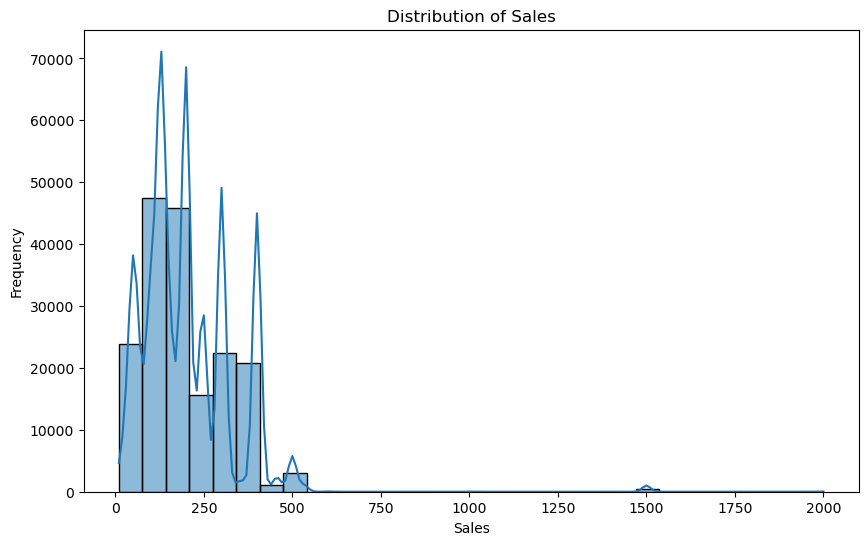

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

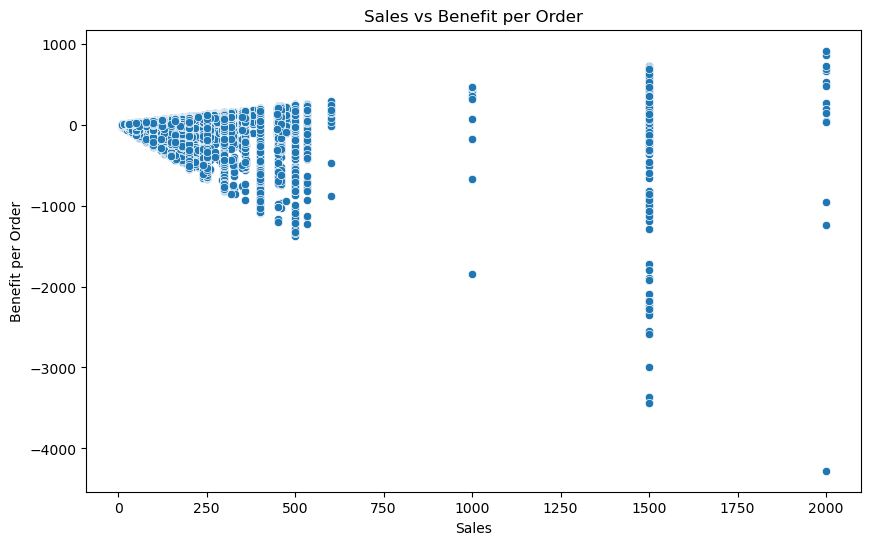

In [30]:
# Scatter plot between Sales and Benefit per order
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Benefit per order', data=data)
plt.title('Sales vs Benefit per Order')
plt.xlabel('Sales')
plt.ylabel('Benefit per Order')
plt.show()

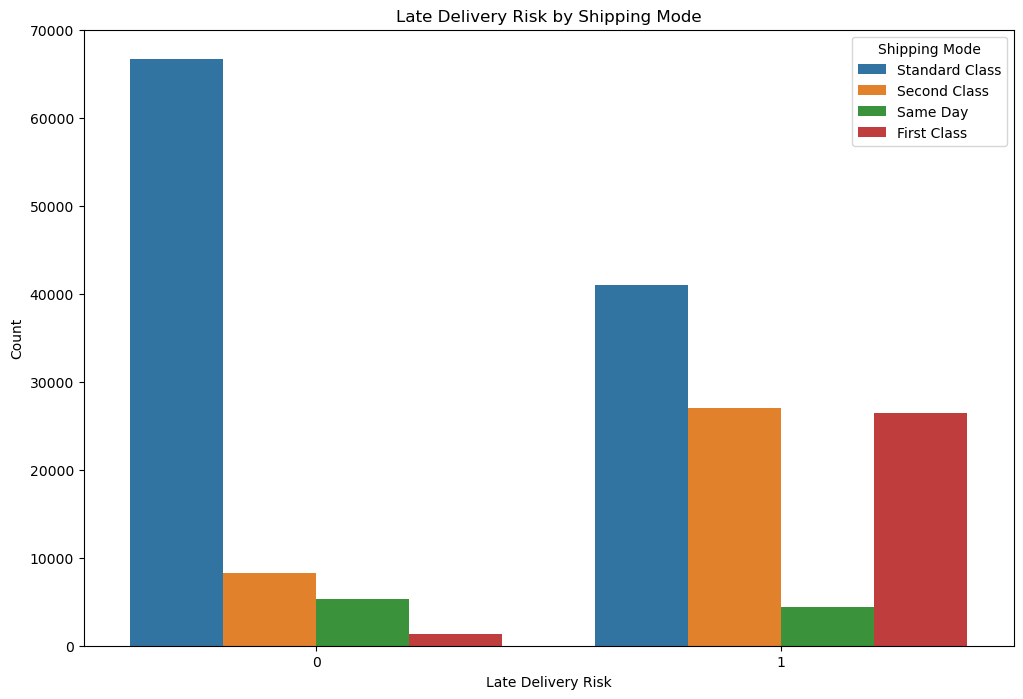

In [32]:
# Count plot of Late Delivery Risk by Shipping Mode
plt.figure(figsize=(12, 8))
sns.countplot(x='Late_delivery_risk', hue='Shipping Mode', data=data)
plt.title('Late Delivery Risk by Shipping Mode')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.legend(title='Shipping Mode')
plt.show()


In [34]:
print(data['Delivery Status'].value_counts())

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


In [36]:
def generate_delivered_date(row):
    shipping_date = row['shipping date (DateOrders)']
    shipping_mode = row['Shipping Mode']

    # Initialize delivered date as NaN
    delivered_date = np.nan

    # Set delivered date only if delivery status is "Shipping on time"
    if row['Delivery Status'] == 'Shipping on time':
        if shipping_mode == 'Standard Class':
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 10))
        elif shipping_mode == 'Second Class':
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 5))
        elif shipping_mode == 'Same Day':
            delivered_date = shipping_date + pd.Timedelta(hours=np.random.randint(1, 12))
        elif shipping_mode == 'First Class':  # Assuming First Class is also a mode
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 3))

    return delivered_date

# Apply the function row-wise to generate delivered dates
data['Delivered Date'] = data.apply(generate_delivered_date, axis=1)

# Display the updated DataFrame
print(data)

            Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
0       

In [38]:
print(data['Delivered Date'].value_counts())

Delivered Date
2016-01-19 17:41:00    5
2015-03-24 02:52:00    5
2015-09-04 00:42:00    5
2015-09-04 14:12:00    5
2015-02-06 01:42:00    5
                      ..
2016-02-18 13:58:00    1
2015-06-07 13:27:00    1
2017-04-21 21:05:00    1
2015-06-11 01:43:00    1
2016-01-26 18:54:00    1
Name: count, Length: 26994, dtype: int64


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is my DataFrame with the required columns
# Feature selection
X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = data['Delivery Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.98
                   precision    recall  f1-score   support

 Advance shipping       0.96      1.00      0.98      8282
    Late delivery       1.00      1.00      1.00     19797
Shipping canceled       1.00      0.58      0.74      1558
 Shipping on time       0.95      1.00      0.98      6467

         accuracy                           0.98     36104
        macro avg       0.98      0.90      0.92     36104
     weighted avg       0.98      0.98      0.98     36104



In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection
X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 17341.34


In [44]:
from sklearn.linear_model import LogisticRegression

X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = (data['Delivery Status'] == 'Shipping on time').astype(int)  # Convert to binary label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29637
           1       0.84      1.00      0.91      6467

    accuracy                           0.97     36104
   macro avg       0.92      0.98      0.95     36104
weighted avg       0.97      0.97      0.97     36104

